# Numerical methods for SDEs: Euler scheme

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

We apply the Euler discretization scheme to the GBM SDE
\begin{equation}
S_{i+1} = S_i + \mu S_i \Delta t + \sigma S_i \Delta W_{i+1}.
\end{equation}

We compare the approximation with the exact solution obtained by
\begin{equation}
    S(t_{i+1}) = S(t_i)\exp\{(\mu-\frac{1}{2}\sigma^2) \Delta t + \sigma\Delta W(t_{i+1})\}.
\end{equation}

In [16]:
def GeneratePathsGBMEuler(NoOfSteps, T, mu, sigma, S_0, NoOfPaths = 1):    
    Z = np.random.normal(loc = 0.0, scale = 1.0, size = [NoOfPaths, NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
   
    # Approximation
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] = S_0
    
    # Exact
    S2 = np.zeros([NoOfPaths, NoOfSteps+1])
    S2[:,0] = S_0
    
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    
    for i in range(0,NoOfSteps):
        # Making sure that samples from a normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
            
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        
        S1[:,i+1] = S1[:,i] + mu * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i])
        S2[:,i+1] = S2[:,i] * np.exp((mu - 0.5*sigma*sigma) * dt + sigma * (W[:,i+1] - W[:,i]))
        time[i+1] = time[i] + dt
        
    # Return S1 and S2
    paths = {"time":time, "S1":S1, "S2":S2}

    return paths

In [17]:
# Define the parameters
N = 5 # number of simulations
m = 20 # time steps
T = 1 # horizon
mu = 0.06
sigma = 0.3
S0 = 50

In [18]:
# Simulated paths

Paths = GeneratePathsGBMEuler(m, T, mu, sigma, S0, N)
timeGrid = Paths["time"]
S1 = Paths["S1"]
S2 = Paths["S2"]

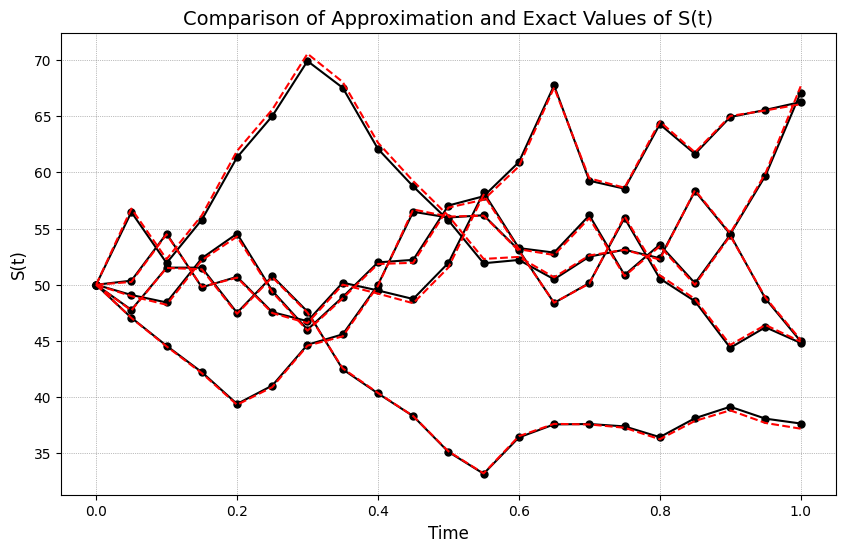

In [19]:

# Create plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(timeGrid, np.transpose(S1), 'k-o', linewidth=1.5, markersize=5, label="Approximation")  # thicker line, larger markers
plt.plot(timeGrid, np.transpose(S2), 'r--', linewidth=1.5, label="Exact")  # dashed line for distinction

# Add grid, labels, and title
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.xlabel("Time", fontsize=12)
plt.ylabel("S(t)", fontsize=12)
plt.title("Comparison of Approximation and Exact Values of S(t)", fontsize=14)
#plt.legend()  # add legend

plt.show()


### Second version

In [20]:
#### Here the code must be completed

def GeneratePathsGBMEuler2(NoOfSteps, NoOfSteps_exact, T, mu, sigma, S_0, NoOfPaths = 1):    
    Z = np.random.normal(loc = 0.0, scale = 1.0, size = [NoOfPaths, NoOfSteps_exact])
    W = np.zeros([NoOfPaths, NoOfSteps_exact+1])
    
    Z1 = np.zeros([NoOfPaths, NoOfSteps])
    W1 = np.zeros([NoOfPaths, NoOfSteps+1])
    
    # Approximation
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] =S_0
    
    # Exact
    S2 = np.zeros([NoOfPaths, NoOfSteps_exact+1])
    S2[:,0] = S_0
    
    time = np.zeros([NoOfSteps_exact+1])
        
    dt = T / float(NoOfSteps_exact)
    M = int(NoOfSteps_exact/NoOfSteps)
    
    for i in range(0, NoOfSteps_exact):
        # Making sure that samples from a normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
            
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        
        S2[:,i+1] = S2[:,i] * np.exp((mu - 0.5*sigma*sigma) * dt + sigma * (W[:,i+1] - W[:,i]))
        time[i+1] = time[i] + dt
        
    
        if i < NoOfSteps: 
            Z1[:, i] = np.sum(Z[:,M*i:(i+1)*M], axis = 1)
            W1[:,i+1] = W1[:,i] + np.power(dt, 0.5)*Z1[:,i]
            
            S1[:,i+1] = S1[:,i] + mu * S1[:,i]* M*dt + sigma * S1[:,i] * (W1[:,i+1] - W1[:,i])

    # Return S1 and S2
    paths = {"time":time, "S1":S1, "S2":S2}

    return paths

In [21]:
# Define the parameters
N = 1 # number of simulations
m = 2**5 # time steps
m_exact = 2**9
T = 1 # horizon
mu = 0.06
sigma = 0.3
S0 = 50

In [22]:
# Simulated paths
Paths = GeneratePathsGBMEuler2(m, m_exact, T, mu, sigma, S0, N)
timeGrid = Paths["time"]
S1 = Paths["S1"]
S2 = Paths["S2"]

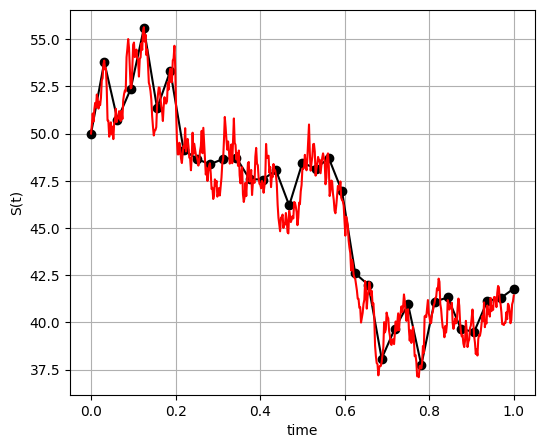

In [23]:
plt.figure(1, figsize = (6,5))
M = int(m_exact/m)
plt.plot(timeGrid[::M], np.transpose(S1), 'k-o')   
plt.plot(timeGrid, np.transpose(S2), '-r')   
plt.grid()
plt.xlabel("time");
plt.ylabel("S(t)");

### Strong convergence

In [24]:
# Strong convergence

NoOfStepsV = range(1,500,1)
N = 1000
errorStrong = np.zeros([len(NoOfStepsV),1])
dtV = np.zeros([len(NoOfStepsV),1])

for idx, m in enumerate(NoOfStepsV):
    Paths = GeneratePathsGBMEuler(m, T, mu, sigma, S0, N)

    # Get the paths at T
    S1_atT = Paths["S1"][:,-1]
    S2_atT = Paths["S2"][:,-1]
    
    errorStrong[idx] = np.mean(np.abs(S1_atT-S2_atT))
    dtV[idx] = T/m  

In [25]:
errorStrong

array([[2.32492947],
       [1.72222336],
       [1.48432627],
       [1.33508107],
       [1.17185151],
       [1.01968431],
       [0.96041458],
       [0.91193991],
       [0.87855702],
       [0.86727234],
       [0.80135191],
       [0.76388101],
       [0.74479073],
       [0.71214671],
       [0.67710158],
       [0.63110222],
       [0.62811051],
       [0.61834653],
       [0.6087081 ],
       [0.59344198],
       [0.56803542],
       [0.56253517],
       [0.55745886],
       [0.55053332],
       [0.52660219],
       [0.51181591],
       [0.50505647],
       [0.50281886],
       [0.4735983 ],
       [0.49521038],
       [0.48393502],
       [0.47727031],
       [0.48445571],
       [0.44865613],
       [0.46672415],
       [0.47253918],
       [0.4382779 ],
       [0.42772538],
       [0.42884342],
       [0.44000913],
       [0.40060877],
       [0.40375908],
       [0.41807348],
       [0.38813205],
       [0.41305308],
       [0.39638234],
       [0.3719023 ],
       [0.397

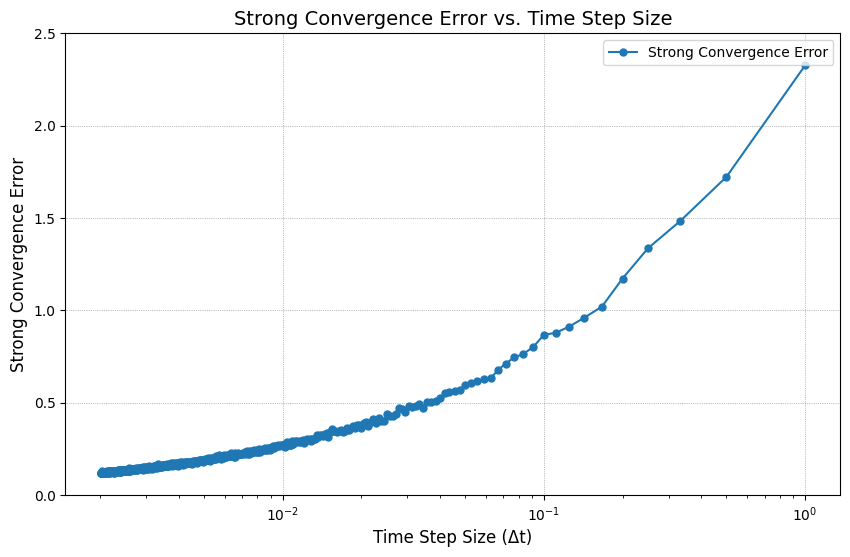

In [26]:
# Create plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(dtV, errorStrong, '-o', linewidth=1.5, markersize=5, label="Strong Convergence Error")

# Add grid, labels, and title
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.xlabel("Time Step Size (Δt)", fontsize=12)
plt.ylabel("Strong Convergence Error", fontsize=12)
plt.title("Strong Convergence Error vs. Time Step Size", fontsize=14)
plt.ylim([0, 2.5])  # Adjust y-axis range as needed
plt.xscale('log')  # Optional: Use a logarithmic scale if dtV has a wide range
plt.legend()  # Add legend if multiple lines are present

plt.show()

### Weak convergence

In [27]:


NoOfStepsV = range(1,500,1)
N = 10000
errorWeak = np.zeros([len(NoOfStepsV),1])
dtV = np.zeros([len(NoOfStepsV),1])

for idx, m in enumerate(NoOfStepsV):
    Paths = GeneratePathsGBMEuler(m, T, mu, sigma, S0, N)

    # Get the paths at T
    S1_atT = Paths["S1"][:,-1]
    S2_atT = Paths["S2"][:,-1]
    
    errorWeak[idx] = np.abs(np.mean(S1_atT)-np.mean(S2_atT))
    dtV[idx] = T/m  

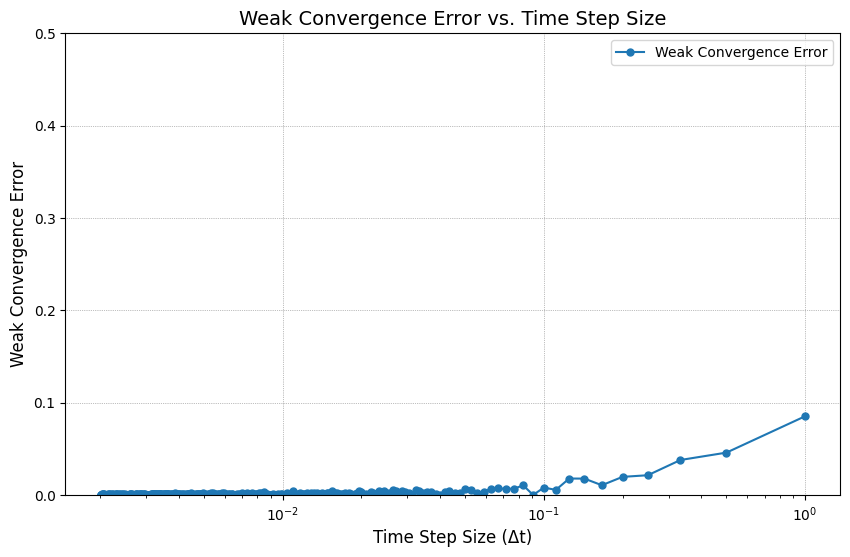

In [28]:
# Create plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(dtV, errorWeak, '-o', linewidth=1.5, markersize=5, label="Weak Convergence Error")

# Add grid, labels, and title
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.xlabel("Time Step Size (Δt)", fontsize=12)
plt.ylabel("Weak Convergence Error", fontsize=12)
plt.title("Weak Convergence Error vs. Time Step Size", fontsize=14)
plt.ylim([0, 0.5])  # Adjust y-axis range as needed
plt.xscale('log')  # Optional: Logarithmic scale for better visualization
plt.legend()  # Add legend if there are multiple lines

plt.show()